# Cogs 108 - Final Project

Team Name: Five Star (Group 15)

# Overview

The purpose of this project was to explore the correlation between word choice and star rating in Yelp reviews to see if there was any correlation between the two.

We decided to analyze this correlation in two types of restaurants to see if this correlation existed, and if Yelp users looked for similar or differing qualities in each type.

The way our group approached this was by first collecting a random sample of each category of reviews. Next, we categorized the words as "good" and "bad," and removed "neutral" words. A word was considered "good" if it most frequently occurred in higher star rating reviews, and "bad" if it most frequently occurred in lower star rating reviews. A word was deemed "neutral" if it occurred in both types of reviews frequently, because that meant the word had no bearing on it being associated with a positive or negative review.

Afterwards, we categorized frequent words by their parts of speech, and used the adjectives to construct dictionaries. Each key in the dictionary was assigned a certain value, creating dummy variables for a linear regression which would compare these values to star ratings and allow us to observe their correlation to one another.

# Group Member Names & IDs

* Aileen Wu: XXXXXXXXX  
* Adrianna Hohil: XXXXXXXXX 
* Tryphena Hu: XXXXXXXXX  
* Kaiwen Li: XXXXXXXXX  
* Jianan Liang: XXXXXXXXX 

# Research Question

Customers mention various positive features in their reviews on Yelp (such as “fast”, “delicious”, “friendly”, “healthy,”, etc).

This lead us to ask: What is the effect of “mentioning a certain feature in review” on a customer’s star-rating? 

# Background and Prior Work

With technology being readily available through smartphones and the internet, people often refer to online forums to discuss quality of service in the food industry. And today, one of the most popular forums that customers use to review restaurants is Yelp. Yelp allows users to discuss their overall experience at a venue by rating the venue and writing about it. Users can rate on a scale of five stars (one being the worst, five being the best) and on a scale of four dollar signs (one being the cheapest, four being the most expensive), while also writing out their experience in a textbox to include service, ambience, wait time, and preferred method of payment. And although some users may take advantage of the platform by submitting overly negative or positive reviews about a restaurant, Yelp regulates this to ensure it’s a reliable source, and 85% of the restaurants on Yelp have ratings that are three stars or higher. (https://computer.howstuffworks.com/internet/social-networking/networks/yelp2.htm) 

Considering all of this information, our project group realized that it was possible to use Yelp to help better restaurant service and advertisement. When using Yelp, customers can use filters or the search bar to find a restaurant by name, or a particular type of restaurant they desire. However, within different types of restaurants (Mediterranean, Italian, Chinese, Mexican, etc.), customers have different preferences for what makes that type of restaurant desirable. For example, at an Italian restaurant one may want free bread and olive oil at the table before the meal versus at a Mexican restaurant, one may want a live music performance. To identify what is considered a “good” type of restaurant in a specific category, our group will be designing a linear regression model that analyzes a number of reviews in a specific category and see what words are used in “good” and “bad” reviews. Each word will be assigned a value. We will be analyzing a number of Italian and Chinese restaurants, and when analyzing reviews for a restaurant in a category, the sum of the number of times both “good” and “bad” words appear will assign that restaurant an overall score. And within each category, we’ll see which Italian restaurants were considered the best, and which Chinese restaurants were considered the best according to their scores and why (depending on the aspects that the customers favored). From there, companies can view their results and compare it to their competitors to see how they can better their overall dining experience and attract more customers.

We have not found prior projects that used Yelp to pursue this idea.

# Hypothesis

Since it’s restaurant industry, we hypothesize that the feature of “delicious” has the biggest positive impact on customers’ star-ratings. 

Justification: Because people intuitively think about food when they evaluate restaurants.  

However, is it possible that some other factors have larger impacts? 

Note: We will figure out the most frequent positive features to look at after some processing of our data. 

# Dataset(s)

Dataset Name:  Yelp Restaurant Reviews  
Link to the dataset: https://www.yelp.com/dataset 

We downloaded our datasets from https://www.yelp.com/dataset. The downloaded data have 6 JSON files (business.json, review.json, user.json, checkin.json, tip.json, photo.json), but we will be only using 2 of them (business.json and review.json) for this project.

We had two datasets from Yelp overall: one that combined reviews of Chinese restaurants and one that combined reviews of Italian restaurants. The observations were initally around 203,000, but that was too much to work with (our run times took around an hour to an hour and thirty minutes). Our group realized this would be problematic when attempting to process or clean data in the future, so we decided to decrease our sample size by randomly sampling both sets to 10,000 observations each. This is what we have worked with through the entirety of this project.

general observations:

    1) It appears that the higher the star rating a customer assigns to a restaurant, the better the experience 
    the customer had at that restaurant (i.e., the more satisfied they were with their experience)   
    
    2) Customers use positive words in higher star reviews to describe their experiences and negative words 
    in lower star reviews to describe their experiences   
   

# Setup

In [1]:
%matplotlib inline

In [2]:
# Imports 

import pandas as pd
import numpy as np
import requests
import bs4
from bs4 import BeautifulSoup
import collections as col
import string
import nltk
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import operator

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Data Cleaning

Here is where we found the frequency of words in both Chinese and Italian reviews, categorized them as either "good" or "bad", and removed "neutral" words. Further explanation of this can be found in the overview.

This section is given as an example to the viewer to see our first cleaning process. We are not running it again because the file sample was so large, 200,000 reviews, and is not needed for the rest of this project. It is also so the rest of our 10,000 samples will stay consistent.

In [ ]:
#import
import pandas as pd
import json
import string
import random

In [ ]:
#read businesses
bus=pd.read_json('business.json',lines=True)

In [ ]:
#get chinese ids only
chinbus=bus[bus.categories.str.contains('Chinese')==True]
chinese=set(chinbus.business_id)

In [ ]:
# read reviews
dataopen = open('review.json','r',encoding='utf-8')

In [ ]:
# place to store review and rate
text=[]
stars=[]

In [ ]:
# write functions to clean review
def remove_punctuation(s):
    output = s
    for c in string.punctuation:
        output = output.replace(c,'')
    return output

def remove_numbers(s):
    output = ""
    for word in s.split():
        if not any(c.isdigit() for c in word):
            output += word + ' '
    return output
            
def remove_articles(s):
    list_of_articles = ['a', 'an', 'and', 'the', 'this', 'they', 'their', 'there', 'them', 'that', 'thats', 'are',
                        'as','its', 'to',  'is', 'it', 'go', 'was', 'were', 'or', 'but', 'so', 'if', 'i', 'for', 'on', 
                        'all', 'in','of', 'at', 'can', 'be', 'have', 'had', 'because', 'said', 'here', 'from', 'like', 
                        'with', 'you', 'your', 'our', 'me', 'we', 'or', 'my']
    output = ""
    for word in s.split():
        if word not in list_of_articles:
            output += word + ' '
    return output

In [ ]:
# get rating and cleaned review
line=dataopen.readline()
while line!='':
    result=json.loads(line)
    if result.get('business_id') in chinese:
        if result.get('text')!=None and result.get('stars')!=None:
            review = result.get('text').lower()
            review = remove_articles(remove_numbers(remove_punctuation(review)))
            if len(review.split())>2:
                text.append(review)
                stars.append(result.get('stars'))
    line=dataopen.readline()

In [ ]:
# write reviews to csv and sample 10000 reviews
df = pd.DataFrame({'stars':stars,'text':text})
df.to_csv('cleaned chinese.csv',index=False)
numbers=random.sample(range(len(df)), 10000)
df = df.loc[numbers]
df.to_csv('sampled chinese.csv',index=False)

In [ ]:
#read businesses
bus=pd.read_json('business.json',lines=True)

In [ ]:
#get italian ids only
italbus=bus[bus.categories.str.contains('Italian')==True]
italian=set(italbus.business_id)

In [ ]:
# read reviews
dataopen = open('review.json','r',encoding='utf-8')

In [ ]:
# place to store review and rate
text=[]
stars=[]

In [ ]:
# get rating and cleaned review
line=dataopen.readline()
while line!='':
    result=json.loads(line)
    if result.get('business_id') in italian:
        if result.get('text')!=None and result.get('stars')!=None:
            review = result.get('text').lower()
            review = remove_articles(remove_numbers(remove_punctuation(review)))
            if len(review.split())>2:
                text.append(review)
                stars.append(result.get('stars'))
    line=dataopen.readline()

In [ ]:
# sample 10000 reviews
df = pd.DataFrame({'stars':stars,'text':text})
df.to_csv('cleaned italian.csv',index=False)
numbers=random.sample(range(len(df)), 10000)
df = df.loc[numbers]
df.to_csv('sampled italian.csv',index=False)

# Chinese Reviews

In [3]:
# getting the frequency of words in the reviews
freqlist=dict()
dfc=pd.read_csv('sampled chinese.csv')
for i in range(len(dfc)):
    for word in dfc.text[i].split():
        if word in freqlist:
            freqlist[word]+=1
        else:
            freqlist.update({word:1})

In [4]:
# Counting frequency of certain words in each star rating type
# Calculate the average of the word, give avg value
#      - Add up how many times specific word shows up in all types of reviews, add them, and divide by 5
df=pd.DataFrame(list(freqlist.values()),columns=['freq'],index=list(freqlist.keys()))
df=df.sort_values(by=['freq'],ascending=False)
df["type"]=""
df["form"]=""
df["rate"]=np.zeros(len(freqlist))
df["1"]=np.zeros(len(freqlist))
df["2"]=np.zeros(len(freqlist))
df["3"]=np.zeros(len(freqlist))
df["4"]=np.zeros(len(freqlist))
df["5"]=np.zeros(len(freqlist))
for i in range(len(dfc)):
    for word in dfc.text[i].split():
            df.at[word,'rate']+=dfc.stars[i]
            df.at[word,str(int(dfc.stars[i]))]+=1

It is apparent from the graph below shows how many five star, four star, three star, two star, and one star ratings are in the sample we used from the Chinese Reviews dataset. In this distribution, we can see that there are around 3,000 five star reviews, around 2,700 four star reviews, around 1,500 three star reviews, around 1,000 two star reviews, and 1,500 one star reviews. This appears to be a equal enough distribution where enough of each type of review is represented for us to work with the data.

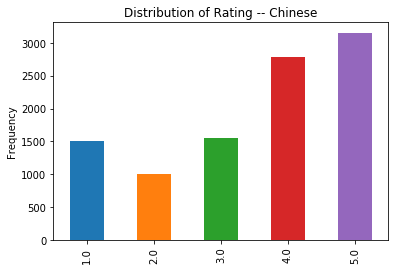

In [5]:
#Visualization of code above
#converts frequency of occurence to percent

dfc['stars'].value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Rating -- Chinese')
plt.show()
df['rate']=df['rate']/df['freq']
df['1']=df['1']/df['freq']/dfc['stars'].value_counts()[1.0]*dfc['stars'].value_counts()[5.0]
df['2']=df['2']/df['freq']/dfc['stars'].value_counts()[2.0]*dfc['stars'].value_counts()[5.0]
df['3']=df['3']/df['freq']/dfc['stars'].value_counts()[3.0]*dfc['stars'].value_counts()[5.0]
df['4']=df['4']/df['freq']/dfc['stars'].value_counts()[4.0]*dfc['stars'].value_counts()[5.0]
df['5']=df['5']/df['freq']

In [6]:
# Correlates the frequency of occurrence of a word with star rating (more occurrence of good word = good reviews)
# Ex：Good shows up 10% of time in 1 star review and 35% of time in 5 star review, it's a good review word
# Ex: Good shows up 35% of time in 1 star review and 10% of time in 5 star review, it's a bad review word

def getType(dataf,w):
    l = list(dataf[['1','2','3','4','5']].loc[w]/sum(list(dataf[['1','2','3','4','5']].loc[w])))
    if( (l[0]-l[4]>.15) or (((l[0]+l[1])/2-(l[3]+l[4])/2)>.15) ):
        return "bad"
    elif( (l[4]-l[0]>.15) or (((l[3]+l[4])/2-(l[0]+l[1])/2)>.15) ):
        return "good"
    else: 
        return "neutral"

In [7]:
#Web scraping to get form of the word - classifies word as noun, adjective, etc.

def getForm(w):
    site_url = 'https://www.dictionary.com/browse/' + w
    page = requests.get(site_url)
    soup = BeautifulSoup(page.content, 'html.parser')
    if soup.find('span',attrs={"class":"luna-pos"}) == None:
        return ""
    form = soup.find('span',attrs={"class":"luna-pos"}).string
    form = form.replace(',','')
    return form

In [8]:
# Get type of word - good vs. bad - more frequent that 5x, get the form of it. ONLY if it occurs 5x

for word in df.index:
    df.at[word,'type']=getType(df,word)
    if df.at[word,'type'] != 'neutral' and df.at[word,'freq'] > 5:
        df.at[word,'form']=getForm(word)

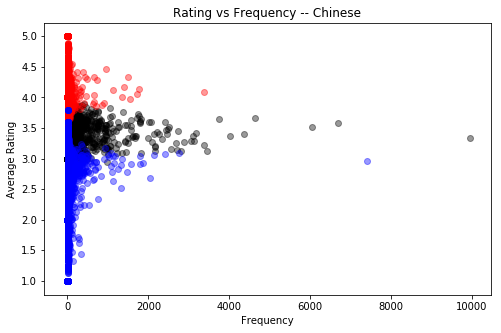

In [9]:
# Plot rating & frequency, the more frequent the word is, the more likely it will be a neutral word
#     - have a lot of frequency
#Bc both good/bad/neutral review use the word, so it's going to be very frequent and therefore neutral

plt.figure(figsize=(8,5))
plt.scatter(df[df['type']=='neutral']['freq'],df[df['type']=='neutral']['rate'],color='black',alpha=0.4)
plt.scatter(df[df['type']=='good']['freq'],df[df['type']=='good']['rate'],color='r',alpha=0.4)
plt.scatter(df[df['type']=='bad']['freq'],df[df['type']=='bad']['rate'],color='b',alpha=0.4)
plt.ylabel('Average Rating')
plt.xlabel('Frequency')
plt.title('Rating vs Frequency -- Chinese')
plt.show()

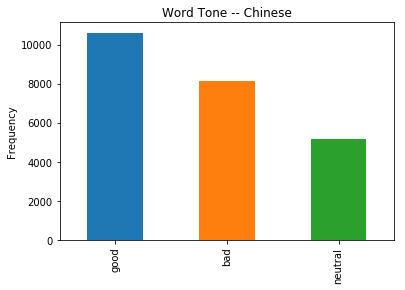

In [10]:
# After categorizing words, this displays the # of good/neutral/bad words

df['type'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Word Tone -- Chinese')
plt.show()

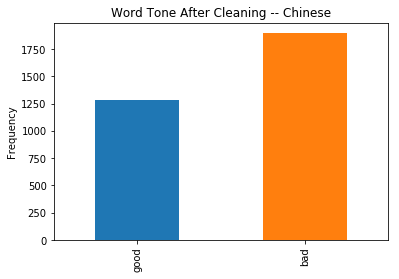

In [11]:
# Remove neutral ones & ones w/o any form (not frequent enough aka <5x ), display in this graph
# Did this bc neutral ones & not frequent enough
# Therefore, it doesn't contribute to the general case of a rating being "good" or "bad"

df1 = df[df['form']!=""]
df1['type'].value_counts(ascending=True).plot.bar()
plt.ylabel('Frequency')
plt.title('Word Tone After Cleaning -- Chinese')
plt.show()

In [12]:
#Takes the 1st word form (adj, noun, etc) bc a word can be used in different forms

def groupform(w):
    return w.split()[0]

In [13]:
#Removed forms that were not useful - ex: pronouns - in the context of being useful for the reviews

#dft.form.unique()
dft = df1[df1.all(axis=1)]
remove = ['pronoun', 'preposition','auxiliary verb','adjective noun',
       'adjective adverb interjection noun verb (used with object)',
       'conjunction','verb (used with or without object)',
       'verb adjective','interjection noun',
       'preposition adverb adjective', 'noun adjective adverb',
       'verb (used with object) adjective noun', 'pronoun;',
        'adverb adjective', 'adverb noun','plural pronoun']
for f in remove:
    dft=dft[dft['form']!=f]
dft['form']=dft['form'].replace('plural noun','noun')
for f in dft.form.unique():
    dft['form']=dft['form'].replace(f,groupform(f))

In [55]:
dft.head(10)

,freq,type,form,rate,1,2,3,4,5
not,7401,bad,adverb,2.963518,0.440876,0.536788,0.440498,0.278272,0.155384
great,3378,good,adjective,4.085850,0.086742,0.177381,0.239767,0.387702,0.441385
order,2750,bad,noun,3.085091,0.506877,0.386978,0.296746,0.320372,0.205091
up,2402,bad,adverb,3.076603,0.459197,0.420956,0.376260,0.307931,0.189009
dont,2136,bad,verb,3.056180,0.472288,0.461690,0.348618,0.289095,0.199906
no,2033,bad,adverb,2.674865,0.641375,0.598676,0.343199,0.211952,0.146090
got,1803,bad,verb,3.038270,0.466650,0.503689,0.333798,0.292307,0.193566
even,1790,bad,adjective,2.913966,0.606842,0.439352,0.308869,0.227457,0.216760
best,1764,good,adjective,4.129252,0.090173,0.199915,0.232464,0.314798,0.500567
always,1713,good,adverb,4.049037,0.107519,0.205867,0.213183,0.382930,0.439580


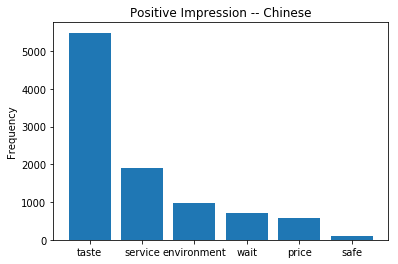

In [14]:
#Manually getting words that are useful
#Separating them into categories which will serve as the dictionaries to loop through for the linear regression later
#Shows what is most important in terms of Chinese restaurant - taste is most important, service is second
# For good words

#for i in range (len(dft[dft['type']=='good'].index)):
#    print(dft[dft['type']=='good'].index[i])
# taste: delicious, fresh, tasty, flavorful, yummy, tender, traditional, flavors, yum, juicy, seasoned, flavourful
# wait: fast
# service: friendly, attentive, generous, helpful, welcoming, welcomed, smiling
# price: reasonable, affordable, reasonably
# environment: atmosphere, fun, beautiful, comfortable, comfort, friendliest
# safe: healthy, healthier
taste1 = ['delicious', 'fresh', 'tasty', 'flavorful', 'yummy', 'tender', 'traditional', 'flavors', 'yum', 'juicy', 
         'seasoned', 'flavourful']
wait1 = ['fast']
service1 = ['friendly', 'attentive', 'generous', 'helpful', 'welcoming', 'welcomed', 'smiling']
price1 = ['reasonable', 'affordable', 'reasonably']
environment1 = ['atmosphere', 'fun', 'beautiful', 'comfortable', 'comfort', 'friendliest'] 
safe1 = ['healthy','healthier']
good={sum(dft.loc[taste1,'freq']):"taste",sum(dft.loc[wait1,'freq']):"wait",
 sum(dft.loc[service1,'freq']):"service",sum(dft.loc[price1,'freq']):"price",
 sum(dft.loc[environment1,'freq']):"environment",sum(dft.loc[safe1,'freq']):"safe"}
goodpair = dict(sorted(good.items(),reverse=True))
plt.bar(range(len(goodpair)), list(goodpair.keys()), align='center')
plt.xticks(range(len(goodpair)), list(goodpair.values()))
plt.ylabel('Frequency')
plt.title('Positive Impression -- Chinese')
plt.show()

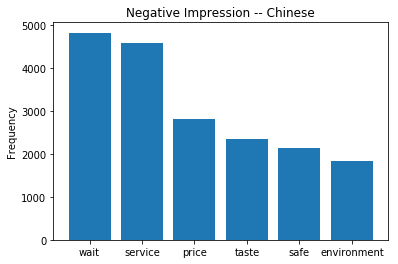

In [15]:
#Manually getting words that are useful
#Separating them into categories which will serve as the dictionaries to loop through for the linear regression later
#Shows what is bad things in terms of Chinese restaurant - wait is the worst, service is second, price is third
# For bad words, aka things customers don't like and effect their experience

#for i in range (len(dft[dft['type']=='bad'].index)):
#    print(dft[dft['type']=='bad'].index[i])
# taste: hard, cold, dry, fat, smell, soggy, tasteless, dried, smelled, mushy, breaded, flavorless, watery, breading, bitter
# chew, grease, fishy, battered, lukewarm, rubber, soaked, flavoring, flavoured
# wait: minutes, last, left, waiting, finally, line, waited, arrived, slow, hours, hungry, taking, forgot, stood, forever
# starving, hunger, lined
# service: server, customer, waitress, waiter, wrong, customers, manager, rude, counter, waiters, attitude, employee,
# attention, hostess, employees, cashier, smile, management, waitresses, treated, register, worker, greeting, managers,
# unfriendly
# price: bill, money, tip, charge, change, cost, card, paid, overpriced, paying, credit, spend, dollars, spent, dollar,
# discount, coupon, costs, changes, gratuity, charges, bills, payment
# environment: table, tables, color, lights, doors, chair, yelling, colour, volume, silence, paint, worn, visibly
# safe: felt, kitchen, dirty, disgusting, sick, stomach, gross, health, raw, edible, hair, nasty, plastic, cleaning, cover,
# covered, uncomfortable, poisoning, hurt, allergic, weak, fly, feelings, dirt, unhealthy, covering

taste2 = ['hard', 'cold', 'dry', 'fat', 'smell', 'soggy', 'tasteless', 'dried', 'smelled', 'mushy', 'breaded', 'flavorless',
          'watery', 'breading', 'bitter', 'chew', 'grease', 'fishy', 'battered', 'lukewarm', 'rubber', 'soaked', 'flavoring',
          'flavoured']
wait2 = ['minutes', 'last', 'left', 'waiting', 'finally', 'line', 'waited', 'arrived', 'slow', 'hours', 'hungry', 'taking', 
         'forgot', 'stood', 'forever', 'starving', 'hunger', 'lined']
service2 = ['server', 'customer', 'waitress', 'waiter', 'wrong', 'customers', 'manager', 'rude', 'counter', 'waiters', 
            'attitude', 'employee', 'attention', 'hostess', 'employees', 'cashier', 'smile', 'management', 'waitresses', 
            'treated', 'register', 'worker', 'greeting', 'managers', 'unfriendly']
price2 = ['bill', 'money', 'tip', 'charge', 'change', 'cost', 'card', 'paid', 'overpriced', 'paying', 'credit', 'spend', 
          'dollars', 'spent', 'dollar', 'discount', 'coupon', 'costs', 'changes', 'gratuity', 'charges', 'bills', 'payment']
environment2 = ['table', 'tables', 'color', 'lights', 'doors', 'chair', 'yelling', 'colour', 'volume', 'silence', 'paint',
                'worn', 'visibly'] 
safe2 = ['felt', 'kitchen', 'dirty', 'disgusting', 'sick', 'stomach', 'gross', 'health', 'raw', 'edible', 'hair', 'nasty', 
         'plastic', 'cleaning', 'cover', 'covered', 'uncomfortable', 'poisoning', 'hurt', 'allergic', 'weak', 'fly', 
         'feelings', 'dirt', 'unhealthy', 'covering']
bad={sum(dft.loc[taste2,'freq']):"taste",sum(dft.loc[wait2,'freq']):"wait",
 sum(dft.loc[service2,'freq']):"service",sum(dft.loc[price2,'freq']):"price",
 sum(dft.loc[environment2,'freq']):"environment",sum(dft.loc[safe2,'freq']):"safe"}
badpair = dict(sorted(bad.items(),reverse=True))
plt.bar(range(len(badpair)), list(badpair.keys()), align='center')
plt.xticks(range(len(badpair)), list(badpair.values()))
plt.ylabel('Frequency')
plt.title('Negative Impression -- Chinese')
plt.show()

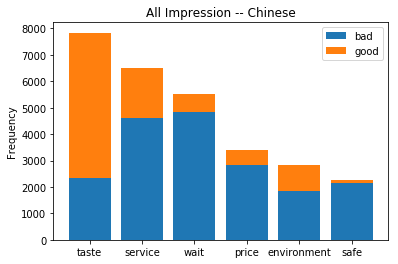

In [16]:
# Combines good & bad together
# Taste is the most important when combining good & bad, service is 2nd, etc.
# The words effect their opinion in the review = overall review of the restaurant

db = {'taste': 0, 'service':0, 'wait':0, 'price':0, 'environment':0, 'safe':0}
dg = {'taste': 0, 'service':0, 'wait':0, 'price':0, 'environment':0, 'safe':0}
for k, v in good.items():
    dg[v]+=k
for k, v in bad.items():
    db[v]+=k
plt.bar(range(len(db)), db.values())
plt.bar(range(len(dg)), dg.values() ,bottom=list(db.values()))
plt.xticks(range(len(good)), db.keys())
plt.ylabel('Frequency')
plt.title('All Impression -- Chinese')
plt.legend(('bad', 'good'))
plt.show()

# Italian Reviews

In [17]:
#All of the same things from above for Italian restaurant
#The words & order are different, but overall same concept

freqlist1=dict()
dfi=pd.read_csv('sampled italian.csv')
for i in range(len(dfi)):
    for word in dfi.text[i].split():
        if word in freqlist1:
            freqlist1[word]+=1
        else:
            freqlist1.update({word:1})

In [18]:
df2=pd.DataFrame(list(freqlist1.values()),columns=['freq'],index=list(freqlist1.keys()))
df2=df2.sort_values(by=['freq'],ascending=False)
df2["type"]=""
df2["form"]=""
df2["rate"]=np.zeros(len(freqlist1))
df2["1"]=np.zeros(len(freqlist1))
df2["2"]=np.zeros(len(freqlist1))
df2["3"]=np.zeros(len(freqlist1))
df2["4"]=np.zeros(len(freqlist1))
df2["5"]=np.zeros(len(freqlist1))
for i in range(len(dfi)):
    for word in dfi.text[i].split():
            df2.at[word,'rate']+=dfi.stars[i]
            df2.at[word,str(int(dfi.stars[i]))]+=1

It is apparent from the graph below shows how many five star, four star, three star, two star, and one star ratings are in the sample we used from the Italian Reviews dataset. In this distribution, we can see that there are around 4,200 five star reviews, around 2,700 four star reviews, around 1,500 three star reviews, around 1,000 two star reviews, and 1,200 one star reviews. This appears to be a equal enough distribution where enough of each type of review is represented for us to work with the data

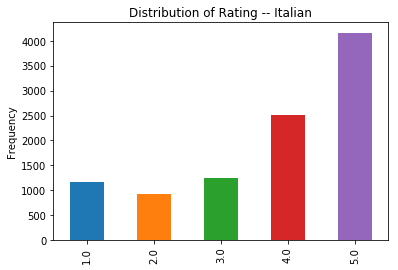

In [19]:
dfi['stars'].value_counts().sort_index().plot.bar()
plt.ylabel('Frequency')
plt.title('Distribution of Rating -- Italian')
plt.show()
df2['rate']=df2['rate']/df2['freq']
df2['1']=df2['1']/df2['freq']/dfi['stars'].value_counts()[1.0]*dfi['stars'].value_counts()[5.0]
df2['2']=df2['2']/df2['freq']/dfi['stars'].value_counts()[2.0]*dfi['stars'].value_counts()[5.0]
df2['3']=df2['3']/df2['freq']/dfi['stars'].value_counts()[3.0]*dfi['stars'].value_counts()[5.0]
df2['4']=df2['4']/df2['freq']/dfi['stars'].value_counts()[4.0]*dfi['stars'].value_counts()[5.0]
df2['5']=df2['5']/df2['freq']

In [20]:
for word in df2.index:
    df2.at[word,'type']=getType(df2,word)
    if df2.at[word,'type'] != 'neutral' and df2.at[word,'freq'] > 5:
        df2.at[word,'form']=getForm(word)

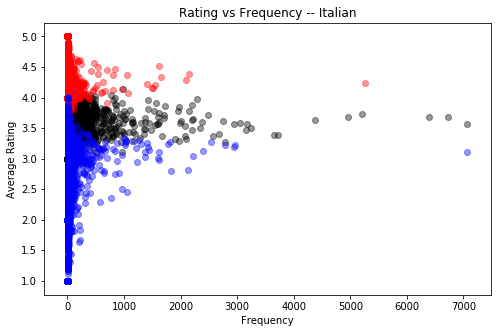

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(df2[df2['type']=='neutral']['freq'],df2[df2['type']=='neutral']['rate'],color='black',alpha=0.4)
plt.scatter(df2[df2['type']=='good']['freq'],df2[df2['type']=='good']['rate'],color='r',alpha=0.4)
plt.scatter(df2[df2['type']=='bad']['freq'],df2[df2['type']=='bad']['rate'],color='b',alpha=0.4)
plt.ylabel('Average Rating')
plt.xlabel('Frequency')
plt.title('Rating vs Frequency -- Italian')
plt.show()

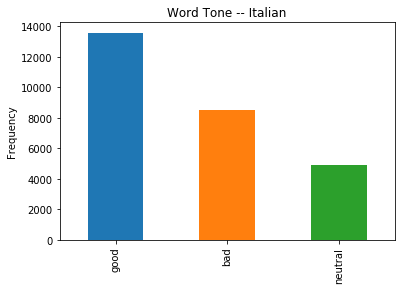

In [23]:
df2['type'].value_counts().plot.bar()
plt.ylabel('Frequency')
plt.title('Word Tone -- Italian')
plt.show()

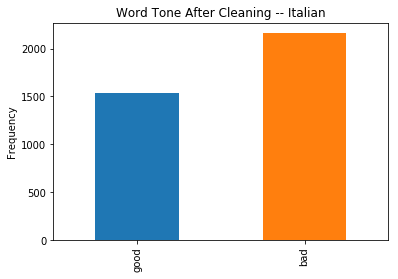

In [24]:
df3 = df2[df2['form']!=""]
df3['type'].value_counts(ascending=True).plot.bar()
plt.ylabel('Frequency')
plt.title('Word Tone After Cleaning -- Italian')
plt.show()

In [25]:
dfe = df3[df3.all(axis=1)]
rm = ['pronoun', 'preposition', 'pronoun;', 'adjective noun', 'auxiliary verb', 'conjunction', 'plural noun', 'noun verb',
     'verb (used with or without object)', 'verb adjective', 'noun adjective adverb','adjective verb', 'pronoun adjective',
     'adjective adverb','adverb adjective']
for f in rm:
    dfe=dfe[dfe['form']!=f]
for f in dfe.form.unique():
    dfe['form']=dfe['form'].replace(f,groupform(f))

In [54]:
dfe.head(10)

,freq,type,form,rate,1,2,3,4,5
not,7068,bad,adverb,3.105971,0.690053,0.785794,0.630794,0.372865,0.219581
great,5263,good,adjective,4.233327,0.101220,0.241624,0.331486,0.487839,0.524416
would,2959,bad,verb,3.217979,0.671481,0.642365,0.547804,0.462395,0.227442
when,2937,bad,adverb,3.191692,0.741466,0.664007,0.521183,0.379568,0.261151
up,2532,bad,adverb,3.268562,0.680944,0.653087,0.502909,0.393832,0.277251
order,2219,bad,noun,3.043713,0.914875,0.639906,0.460885,0.391904,0.228932
delicious,2154,good,adjective,4.381151,0.063501,0.118909,0.249809,0.529079,0.561746
no,2139,bad,adverb,2.811127,1.061838,0.831900,0.434373,0.320603,0.196353
best,2096,good,adjective,4.291031,0.135667,0.280845,0.280640,0.335873,0.613073
even,1816,bad,adjective,3.267621,0.743285,0.655717,0.423292,0.356647,0.305617


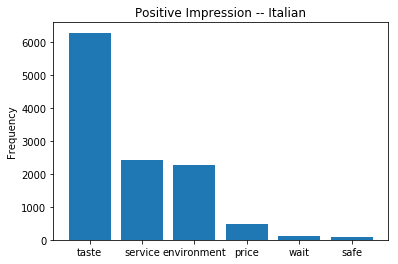

In [26]:
#for i in range (len(dfe[dfe['type']=='good'].index)):
#    print(dfe[dfe['type']=='good'].index[i])
# taste: delicious, fresh, tasty, crispy, authentic, spicy, yummy, flavorful, creamy, crisp, flavours
# wait: fast, efficient, timely
# service: friendly, attentive, lovely, welcoming, accommodating, welcome, welcomed, hospitality
# price: reasonable, casual, reasonably, affordable, inexpensive
# environment: atmosphere, ambiance, beautiful, comfortable, environment, ambience, modern, lighting, beautifully, relaxed
# safe: healthy, allergies
taste3 = ['delicious', 'fresh', 'tasty', 'crispy', 'authentic', 'spicy', 'yummy', 'flavorful', 'creamy', 'crisp',
          'flavours']
wait3 = ['efficient', 'timely']
service3 = ['friendly', 'attentive', 'lovely', 'welcoming', 'accommodating', 'welcome', 'welcomed', 'hospitality']
price3 = ['reasonable', 'affordable', 'reasonably']
environment3 = ['atmosphere', 'ambiance', 'beautiful', 'comfortable', 'environment', 'ambience', 'modern', 'lighting',
                'beautifully', 'relaxed'] 
safe3 = ['healthy', 'allergies']
good1={sum(dfe.loc[taste3,'freq']):"taste",sum(dfe.loc[wait3,'freq']):"wait",
 sum(dfe.loc[service3,'freq']):"service",sum(dfe.loc[price3,'freq']):"price",
 sum(dfe.loc[environment3,'freq']):"environment",sum(dfe.loc[safe3,'freq']):"safe"}
goodpair1 = dict(sorted(good1.items(),reverse=True))
plt.bar(range(len(goodpair1)), list(goodpair1.keys()), align='center')
plt.xticks(range(len(goodpair1)), list(goodpair1.values()))
plt.ylabel('Frequency')
plt.title('Positive Impression -- Italian')
plt.show()

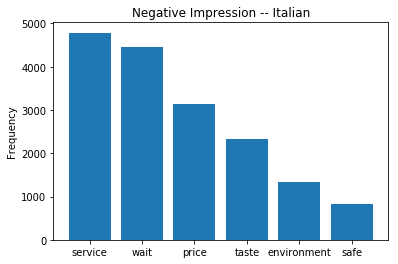

In [27]:
#for i in range (len(dfe[dfe['type']=='bad'].index)):
#    print(dfe[dfe['type']=='bad'].index[i])
# taste: tasted, cold, dry, soggy, greasy, smell, dried, sour, rubbery, grease, bitter, smelled, flavorless, mushy, breading
# watery, cardboard, fishy, smells
# wait: minutes, hour, left, waiting, arrived, hours, slow, line, minute, min, mins, starving, seconds, waits
# service: waiter, waitress, manager, customer, customers, hostess, bartender, rude, employees, management, attitude, host, 
# treated, complain, employee, apologized, waitresses, ignored, guest, apology, apologize, cashier, complained, greet, 
# complaining, hostesses, greeting, trained, unfriendly, rudeness
# price: bill, money, pay, tip, cheap, paid, charge, overpriced, cost, card, paying, spend, spent, charged, dollars, coupon
# credit, cash, fee, dollar, discount, bills, charging, receipt, wallet, tipped
# environment: room, seat, circus, window, rooms, seats, annoying, chair, fans
# safe: dirty, hair, disgusting, raw, stomach, gross, sick, cleaned, safe, cover, plastic, weak, nasty, health, fly, bug, 
# flies, dust, allergic, uncooked
taste4 = ['tasted', 'cold', 'dry', 'soggy', 'greasy', 'smell', 'dried', 'sour', 'rubbery', 'grease', 'bitter', 'smelled',
          'flavorless', 'mushy', 'breading', 'watery', 'cardboard', 'fishy', 'smells']
wait4 = ['minutes', 'hour', 'left', 'waiting', 'arrived', 'hours', 'slow', 'line', 'minute', 'min', 'mins', 'starving', 
         'seconds', 'waits']
service4 = ['waiter', 'waitress', 'manager', 'customer', 'customers', 'hostess', 'bartender', 'rude', 'employees', 
            'management', 'attitude', 'host', 'treated', 'complain', 'employee', 'apologized', 'waitresses', 'ignored',
            'guest', 'apology', 'apologize', 'cashier', 'complained', 'greet', 'complaining', 'hostesses', 'greeting', 
            'trained', 'unfriendly', 'rudeness']
price4 = ['bill', 'money', 'pay', 'tip', 'cheap', 'paid', 'charge', 'overpriced', 'cost', 'card', 'paying', 'spend', 
          'spent', 'charged', 'dollars', 'coupon', 'credit', 'cash', 'fee', 'dollar', 'discount', 'bills', 'charging', 
          'receipt', 'wallet', 'tipped']
environment4 = ['room', 'seat', 'circus', 'window', 'rooms', 'seats', 'annoying', 'chair', 'fans'] 
safe4 = ['dirty', 'hair', 'disgusting', 'raw', 'stomach', 'gross', 'sick', 'cleaned', 'safe', 'cover', 'plastic', 'weak',
         'nasty', 'health', 'fly', 'bug', 'flies', 'dust', 'allergic', 'uncooked']
bad1={sum(dfe.loc[taste4,'freq']):"taste",sum(dfe.loc[wait4,'freq']):"wait",
 sum(dfe.loc[service4,'freq']):"service",sum(dfe.loc[price4,'freq']):"price",
 sum(dfe.loc[environment4,'freq']):"environment",sum(dfe.loc[safe4,'freq']):"safe"}
badpair1 = dict(sorted(bad1.items(),reverse=True))
plt.bar(range(len(badpair1)), list(badpair1.keys()), align='center')
plt.xticks(range(len(badpair1)), list(badpair1.values()))
plt.ylabel('Frequency')
plt.title('Negative Impression -- Italian')
plt.show()

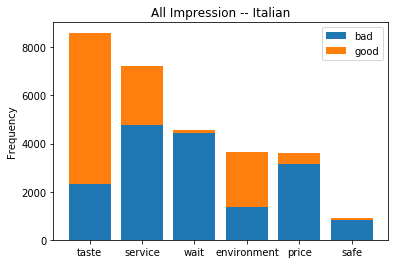

In [28]:
db1 = {'taste': 0, 'service':0, 'wait':0, 'environment':0, 'price':0,'safe':0}
dg1 = {'taste': 0, 'service':0, 'wait':0, 'environment':0, 'price':0, 'safe':0}
for k, v in good1.items():
    dg1[v]+=k
for k, v in bad1.items():
    db1[v]+=k
plt.bar(range(len(db1)), db1.values())
plt.bar(range(len(dg1)), dg1.values() ,bottom=list(db1.values()))
plt.xticks(range(len(good1)), db1.keys())
plt.ylabel('Frequency')
plt.title('All Impression -- Italian')
plt.legend(('bad', 'good'))
plt.show()

# Data Processing

In this section, our group used categorized certain groups of words into different dictionaries, "Good Taste," "Good Wait," "Good Service," 

In [29]:
# Load files and create dataframes
df_chi = pd.read_csv('sampled chinese.csv')
df_ital = pd.read_csv('sampled italian.csv')

# Prepare a dictionary to check if our words in categories appear often in actual reviews
df_co = pd.concat([df_chi, df_ital], ignore_index=True)
dict_co = {}
dict_co = col.defaultdict(lambda: 0, dict_co)

In [30]:
# Create our own categories for dummy variables: General Positive Words

good = {
  "good": 0,
  "best": 0,
  "great": 0,
  "awesome": 0,
  "nice": 0,
  "wonderful": 0,
  "pleasant": 0,
  "pleasing": 0,
  "fine": 0,
  "incredible": 0,
  "excellent": 0,
  "exceptional": 0,
  "splendid": 0,
  "lit": 0,
  "amazing": 0,
  "fantastic": 0,
  "outstanding": 0,
  "appealing": 0,
  "love": 0,
  "legit": 0
}

In [31]:
# Create our own categories for dummy variables: Good Taste

taste1 = {
  "delicious": 0,
  "tasty": 0,
  "yummy": 0,
  "yum": 0,
  "juicy": 0,
  "flavourful": 0,
  "fresh": 0,
  "tender": 0,
  "seasoned": 0,
  "appetizing": 0,
  "delectable": 0,
  "tasteful": 0,
  "savory": 0,
  "authentic": 0,
  "delish": 0
}

taste2 = {
  "food": 0,
  "flavors": 0,
  "flavor": 0,
  "chicken": 0,
  "salad": 0,
  "pork": 0,
  "desserts": 0,
  "dessert": 0,
  "dumplings": 0,
  "dumpling": 0,
  "fish": 0,
  "beef": 0,
  "steak": 0,
  "spaghetti": 0,
  "rice": 0,
  "fry": 0,
  "fries": 0,
  "pizza": 0,
  "ramen": 0,
  "soup": 0,
  "spice": 0,
  "sauce": 0,
  "wine": 0,
  "tea": 0,
  "sandwich": 0
}

In [32]:
# Create our own categories for dummy variables: Short Waiting

wait1 = {
  "fast": 0,
  "efficient": 0,
  "timely": 0,
  "quick": 0,
  "quickly": 0,
  "short": 0,
  "soon": 0,
  "minute": 0,
  "moment": 0
}

wait2 = {
  "waiting": 0,
  "speed": 0
}

In [33]:
# Create our own categories for dummy variables: Good Service

service1 = {
  "friendly": 0,
  "sweet": 0,
  "lovely": 0,
  "accommodating": 0,
  "attentive": 0,
  "cute": 0,
  "kind": 0,
  "generous": 0,
  "helpful": 0,
  "welcoming": 0,
  "welcomed": 0,
  "smiling": 0,
  "friendliest": 0
}

service2 = {
  "hospitality": 0,
  "service": 0,
  "waiter": 0,
  "waiters": 0,
  "waitress": 0,
  "waitresses": 0,
  "server": 0,
  "servers": 0
}

In [34]:
# Create our own categories for dummy variables: Good Ambience

ambience1 = {
  "clean": 0,
  "comfortable": 0,
  "beautiful": 0,
  "modern": 0,
  "relaxed": 0,
  "quiet": 0,
  "elegant": 0,
  "neat": 0,
  "delicate": 0
}

ambience2 = {
  "atmosphere": 0,
  "environment": 0,
  "lighting": 0,
  "design": 0,
  "vibe": 0,
  "decoration": 0,
  "decorations": 0,
  "tone": 0,
  "place": 0,
  "visually": 0,
  "ambience": 0,
  "ambiance": 0
}

In [35]:
# Create our own categories for dummy variables: Good Price

price1 = {
  "worthy": 0,
  "affordable": 0,
  "cheap": 0,
  "deal": 0,
  "low": 0,
  "reasonable": 0,
  "reasonably": 0   
}

price2 = {
  "price": 0,
  "pricing": 0,
  "prices": 0,
  "bill": 0,
  "discount": 0
}

In [36]:
# Create our own categories for dummy variables: Food Safety (Negative Criteria)

safe = {
  "sick": 0,
  "raw": 0,
  "uncooked": 0,
  "fly": 0,
  "flies": 0,
  "bug": 0,
  "hair": 0,
  "plastic": 0,
  "diarrhea": 0,
  "tummy": 0,
  "expired": 0,
  "hurt": 0,
  "painful": 0,
  "pain": 0,
  "dirty": 0,
  "nasty": 0,
  "unhealthy": 0,
  "gross": 0
}

In [37]:
# Convert reviews into "0"(none) or "1"(yes) for each Positive Category

def initial(df):
    df['Good Taste'] = 0
    df['Short Wait'] = 0
    df['Good Service'] = 0
    df['Good Ambience'] = 0
    df['Good Price'] = 0
    df['Food Safety'] = 1
    
    for i in range(len(df.index)):
            
        tempString = df.loc[i, 'text']
        tempList = tempString.split()
        
        for j in range(len(tempList)):
            if (any(c.isalpha() for c in tempList[j])):
                dict_co[tempList[j]] += 1
                # First, check if positive adjectives appear in the review
                if tempList[j] in taste1 and tempList[j-1] != "not" and tempList[j-2] !="not":
                    df.loc[i, 'Good Taste'] = 1
                elif tempList[j] in wait1 and tempList[j-1] != "not" and tempList[j-2] !="not":
                    df.loc[i, 'Short Wait'] = 1
                elif tempList[j] in service1 and tempList[j-1] != "not" and tempList[j-2] !="not":
                    df.loc[i, 'Good Service'] = 1
                elif tempList[j] in ambience1 and tempList[j-1] != "not" and tempList[j-2] !="not":
                    df.loc[i, 'Good Ambience'] = 1
                elif tempList[j] in price1 and tempList[j-1] != "not" and tempList[j-2] !="not":
                    df.loc[i, 'Good Price'] = 1
                elif tempList[j] in safe:
                    df.loc[i, 'Food Safety'] = 0
                # If something like "good/amazing/great" appear, check if the words BEFORE it belong to a category
                elif tempList[j] in good and j >= 4: 
                    if tempList[j-4] in taste2 or tempList[j-3] in taste2 or tempList[j-2] in taste2 or tempList[j-1] in taste2:
                        df.loc[i, 'Good Taste'] = 1
                    elif tempList[j-4] in wait2 or tempList[j-3] in wait2 or tempList[j-2] in wait2 or tempList[j-1] in wait2:
                        df.loc[i, 'Short Wait'] = 1
                    elif tempList[j-4] in service2 or tempList[j-3] in service2 or tempList[j-2] in service2 or tempList[j-1] in service2:
                        df.loc[i, 'Good Service'] = 1
                    elif tempList[j-4] in ambience2 or tempList[j-3] in ambience2 or tempList[j-2] in ambience2 or tempList[j-1] in ambience2:
                        df.loc[i, 'Good Ambience'] = 1
                    elif tempList[j-4] in price2 or tempList[j-3] in price2 or tempList[j-2] in price2 or tempList[j-1] in price2:
                        df.loc[i, 'Good Price'] = 1
                # If something like "good/amazing/great" appear, check if the word AFTER it belongs to a category
                if tempList[j-1] in good or tempList[j-2] in good: 
                    if tempList[j] in taste2:
                        df.loc[i, 'Good Taste'] = 1
                    elif tempList[j] in wait2:
                        df.loc[i, 'Short Wait'] = 1
                    elif tempList[j] in service2:
                        df.loc[i, 'Good Service'] = 1
                    elif tempList[j] in ambience2:
                        df.loc[i, 'Good Ambience'] = 1
                    elif tempList[j] in price2:
                        df.loc[i, 'Good Price'] = 1

initial(df_chi)
initial(df_ital)

In [38]:
def match(dict):
    for x in dict:
        if x in dict_co:
            dict.update({x: dict_co[x]})
    print(dict)

    
types = [good, taste1, taste2, wait1, wait2, service1, service2, ambience1, ambience2, price1, price2, safe]    

# Checked the frequency of words in our categories; explore the data
i = 0
for x in types:
    match(types[i])
    i+=1

{'good': 13091, 'best': 3860, 'great': 8641, 'awesome': 1178, 'nice': 3889, 'wonderful': 761, 'pleasant': 383, 'pleasing': 28, 'fine': 567, 'incredible': 300, 'excellent': 1728, 'exceptional': 153, 'splendid': 10, 'lit': 52, 'amazing': 2577, 'fantastic': 792, 'outstanding': 335, 'appealing': 45, 'love': 3047, 'legit': 75}
{'delicious': 3641, 'tasty': 1553, 'yummy': 565, 'yum': 312, 'juicy': 223, 'flavourful': 126, 'fresh': 2850, 'tender': 520, 'seasoned': 242, 'appetizing': 57, 'delectable': 42, 'tasteful': 32, 'savory': 106, 'authentic': 969, 'delish': 133}
{'food': 17025, 'flavors': 441, 'flavor': 1558, 'chicken': 5967, 'salad': 2339, 'pork': 2055, 'desserts': 375, 'dessert': 1237, 'dumplings': 1069, 'dumpling': 287, 'fish': 1017, 'beef': 2368, 'steak': 675, 'spaghetti': 521, 'rice': 3265, 'fry': 130, 'fries': 478, 'pizza': 6790, 'ramen': 273, 'soup': 2902, 'spice': 262, 'sauce': 4373, 'wine': 1503, 'tea': 1077, 'sandwich': 563}
{'fast': 1002, 'efficient': 176, 'timely': 70, 'quick':

# Data Analysis and Results

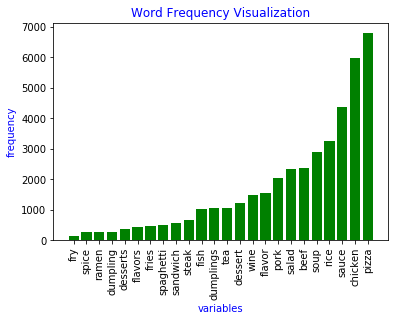

In [39]:
# Plot a chart to show how frequently each type of food appears
taste2.pop('food')

lists = sorted(taste2.items(), key=operator.itemgetter(1))
x, y = zip(*lists)

plt.xticks(rotation=90)
plt.title('Word Frequency Visualization', color = 'b')
plt.xlabel('variables', color = 'b')
plt.ylabel('frequency', color = 'b')
plt.bar(x, y, color='g')
plt.rcParams['figure.figsize'] = [25, 10]
plt.show()

# Star Rating Correlation to Word Category

This data visualization set uses bar graphs to show the frequency of a reviewer using words that fall into certain categories (good taste, short wait, good service, good ambience, good price food safety) and the star rating given (one star, two star, three stars, four stars, or five stars). For example, when the feature “good taste” is presented as opposed to not, the visualization showed a high frequency in correlation to five-star reviews. 

According to the visualization set “Good taste” and “Food safety” had the greatest number of occurrences for both the Italian and Chinese csv, this might suggest they have a greater influence on the rating given. It is surprising that “food safety” is mentioned significantly in higher ratings, since we expected “food safety” to be an outlier since it is more likely that people would talk about food safety in cases of bad food safety since generally people expect good food safety as a given at restaurants. These correlations in a high frequency of words associated with good taste and food safety as opposed no mention of words related to these categories might lead to us to infer that these categories have greater influence on the star rating the business receives.

We expect that when positive words appear, its frequency on higher star-ratings should be higher. It turns out that our expectation is consistent with most of the positive words on the perspective of cross-stars comparison, but we are not sure why the "None" types of reviews exhibit the similar distribution. It might be due to our limited choices of positive words in each category, and our limited algorithm on sentiment analysis. We will continue to explore the linear regression to see the effect.

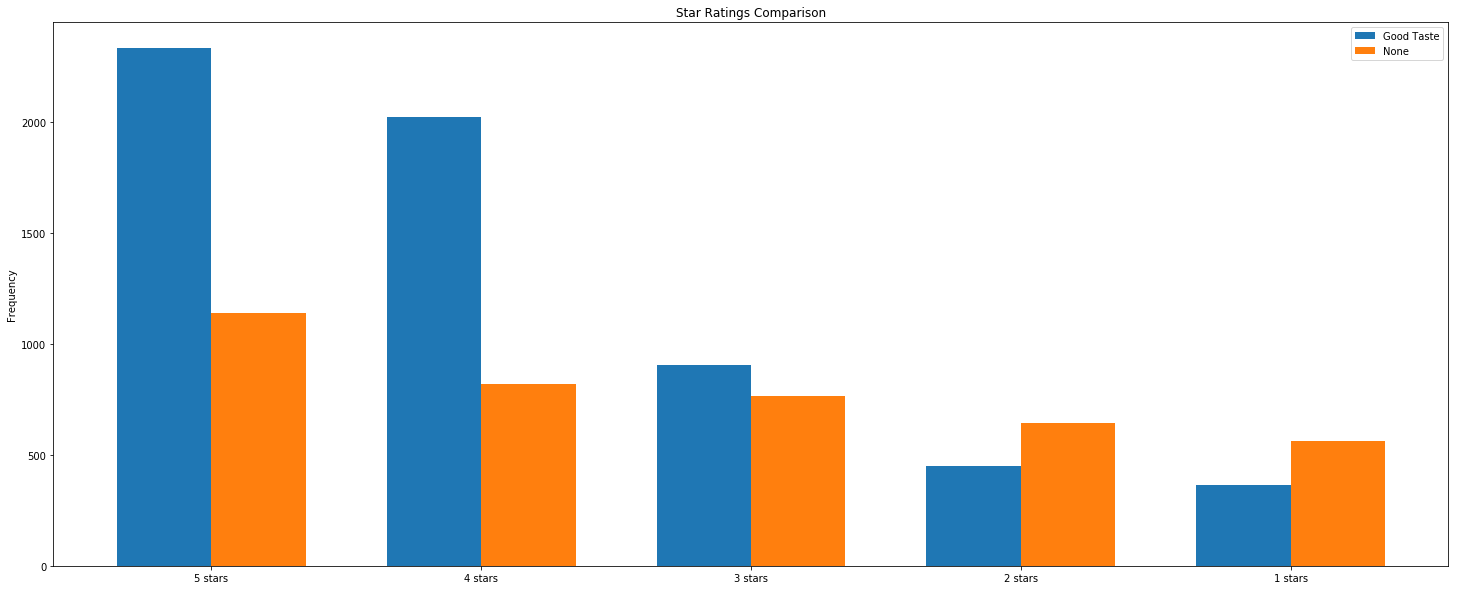

In [40]:
# See the distribution of star ratings when a positive feature is presented and when it's not

def feature_rating(df,string):
    df_temp1 = df[df[string]>0]
    temp1 = df_temp1['stars'].value_counts()
    df_temp2 = df[df[string]<1]
    temp2 = df_temp2['stars'].value_counts()
    
    ind = np.arange(5) 
    width = 0.35       
    plt.bar(ind, temp1, width, label=string)
    plt.bar(ind + width, temp2, width,
        label='None')

    plt.ylabel('Frequency')
    plt.title('Star Ratings Comparison')

    plt.xticks(ind + width / 2, ('5 stars', '4 stars', '3 stars', '2 stars', '1 stars'))
    plt.legend(loc='best')
    plt.show()
    
feature_rating(df_chi,'Good Taste')

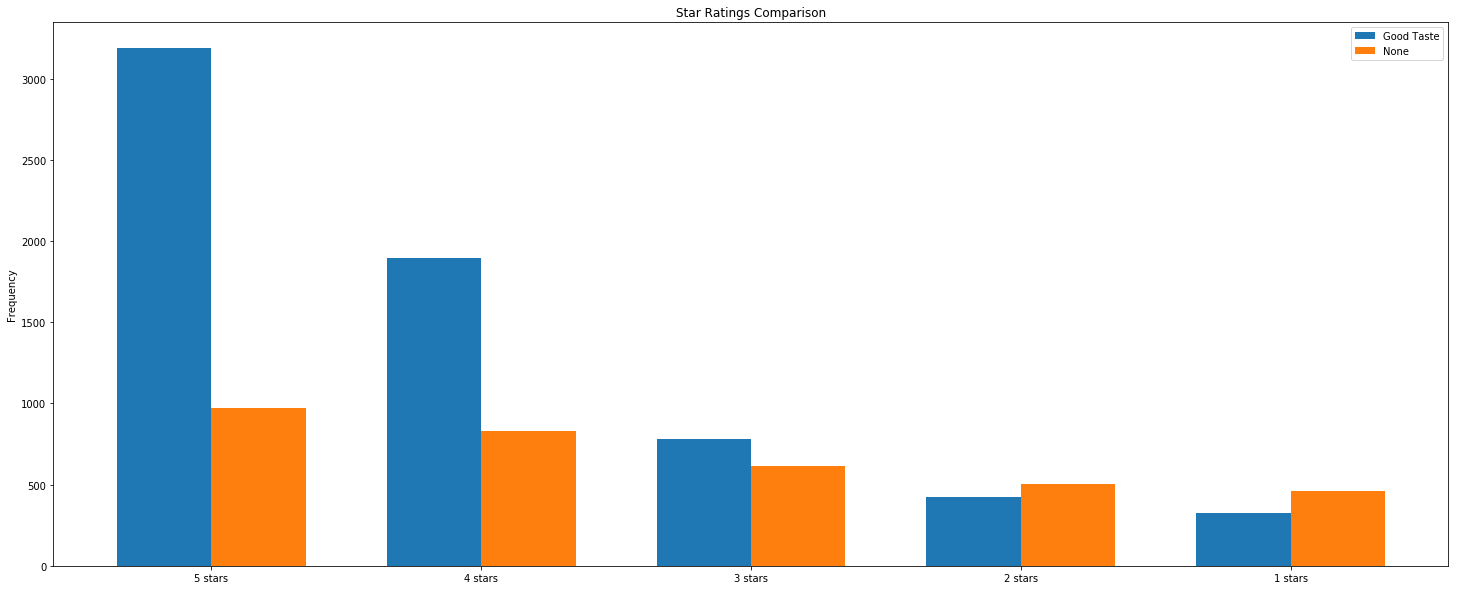

In [41]:
feature_rating(df_ital,'Good Taste')

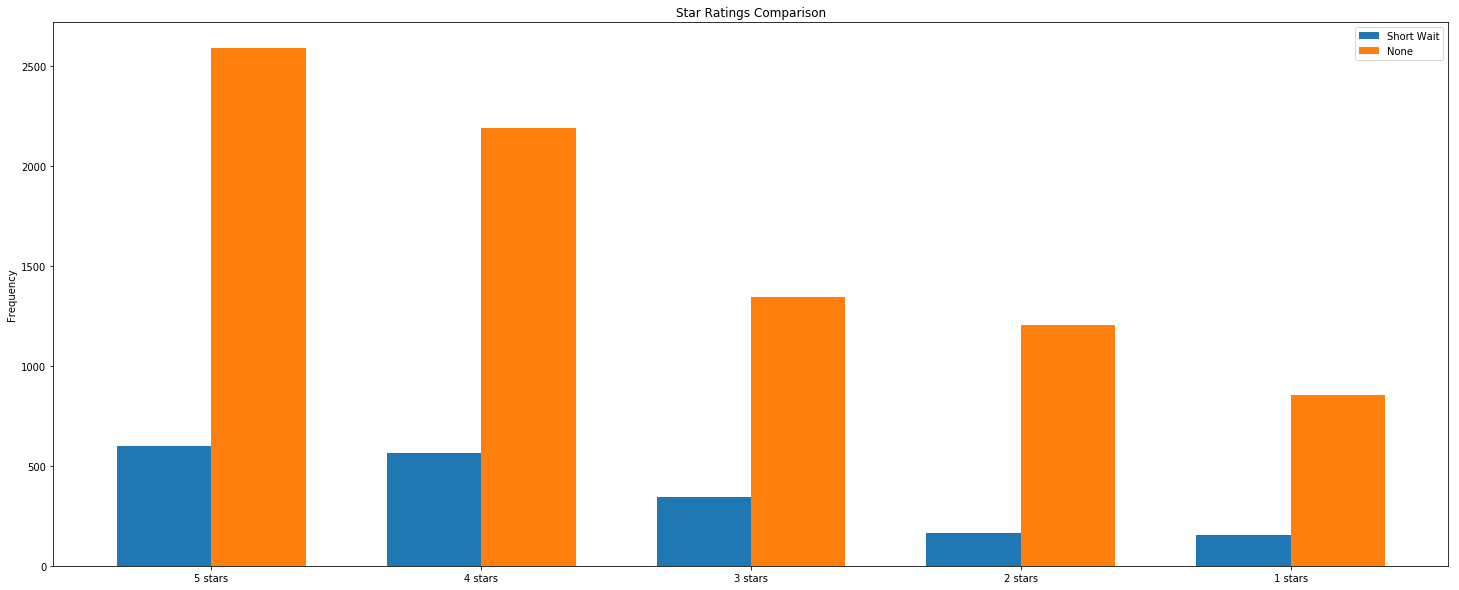

In [43]:
feature_rating(df_chi,'Short Wait')

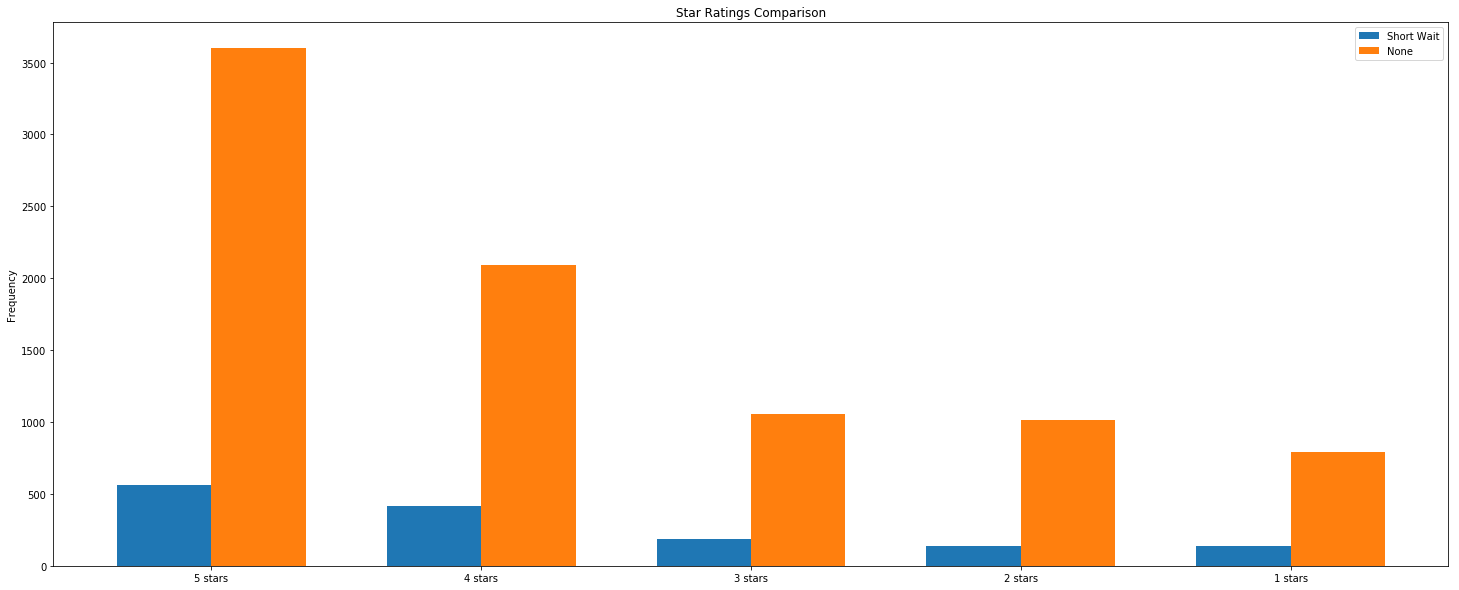

In [44]:
feature_rating(df_ital,'Short Wait')

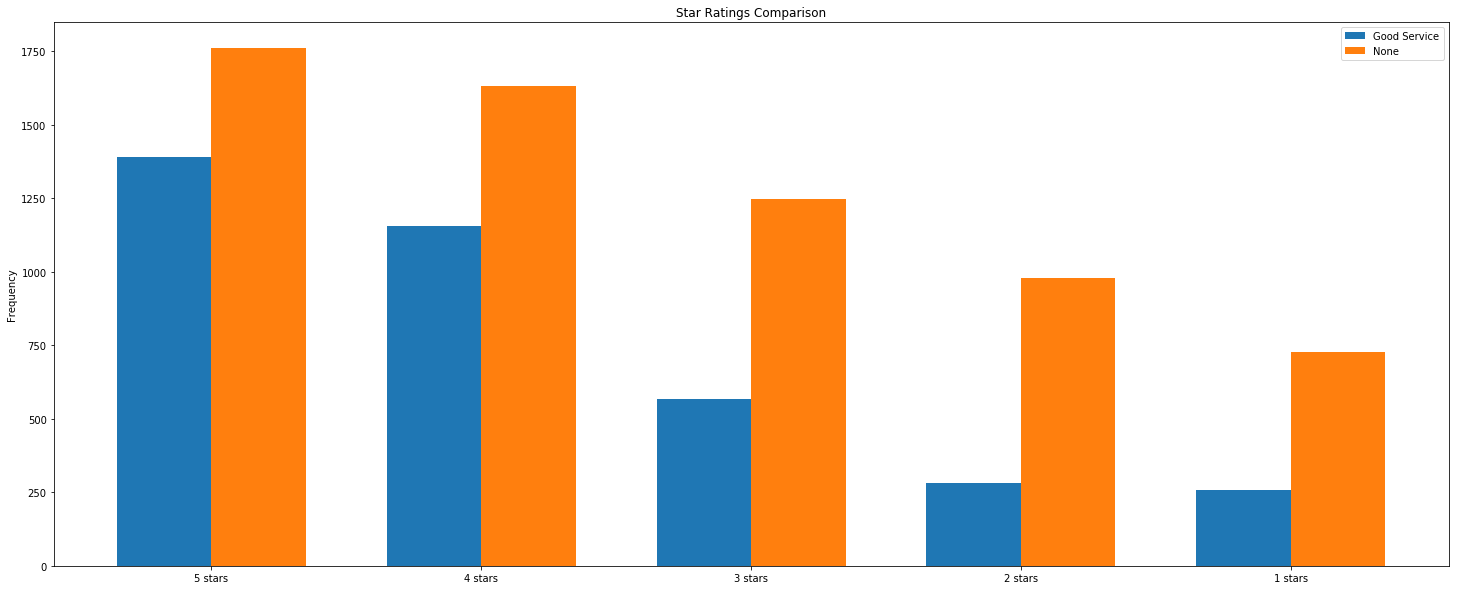

In [45]:
feature_rating(df_chi,'Good Service')

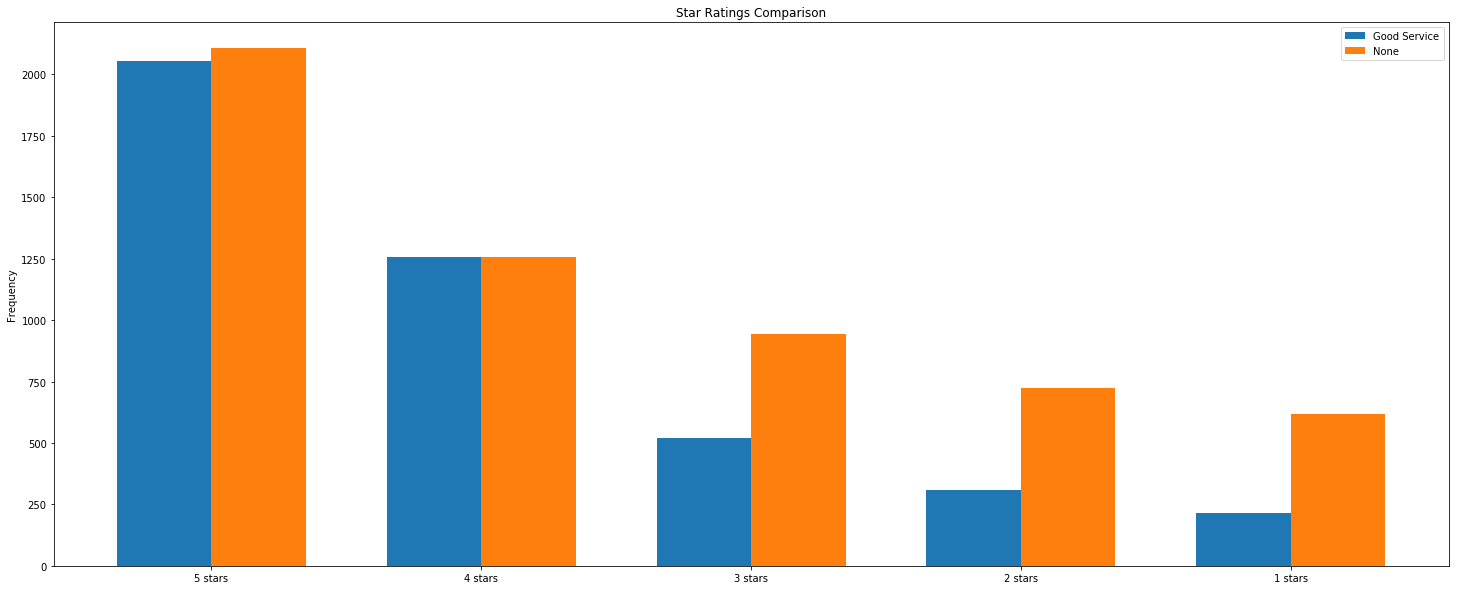

In [46]:
feature_rating(df_ital,'Good Service')

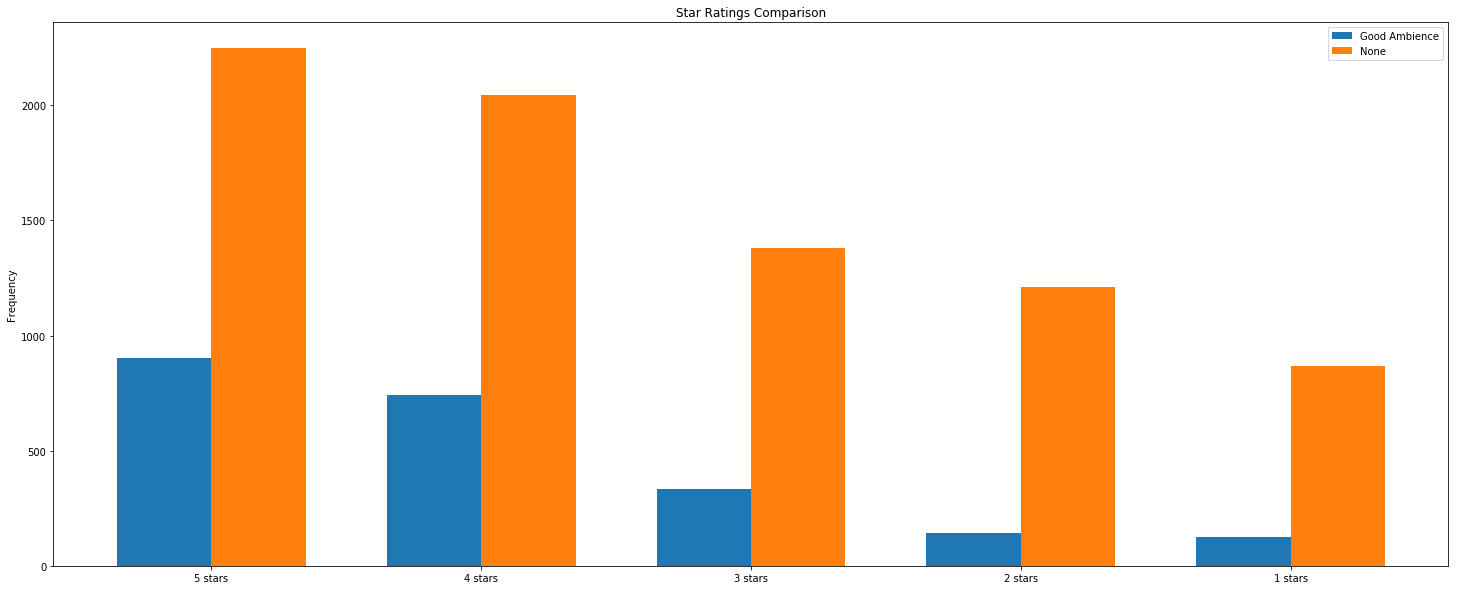

In [47]:
feature_rating(df_chi,'Good Ambience')

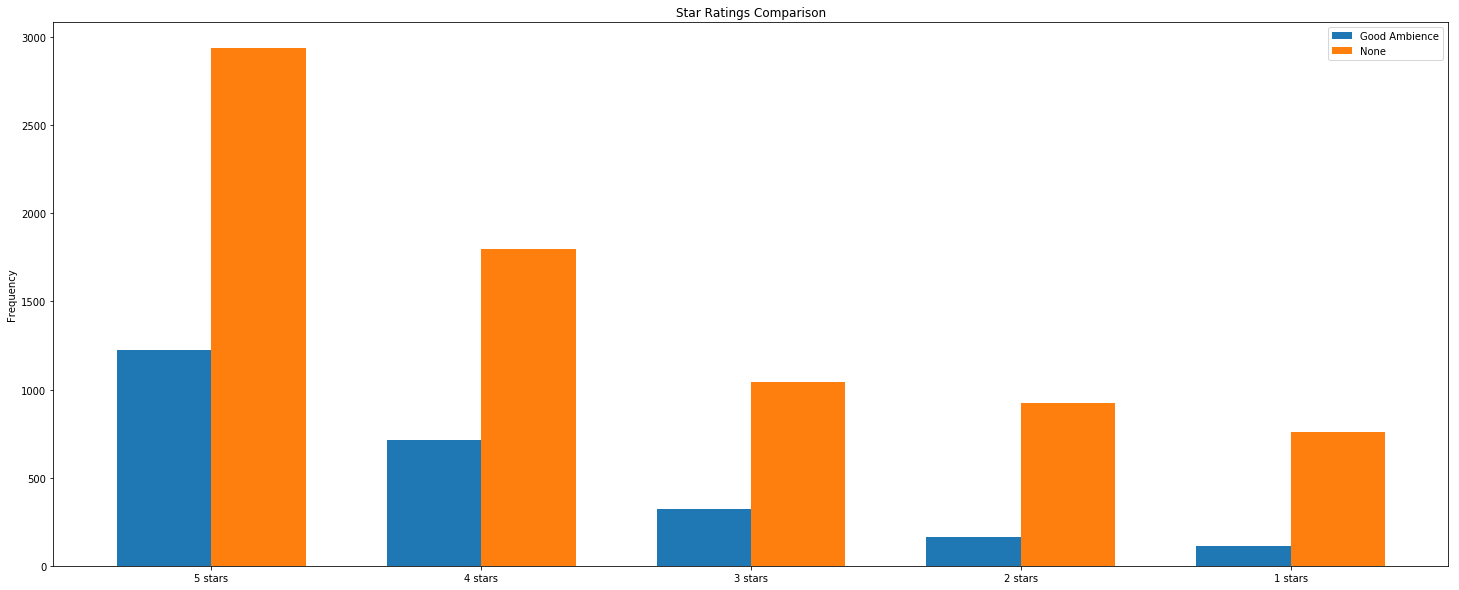

In [48]:
feature_rating(df_ital,'Good Ambience')

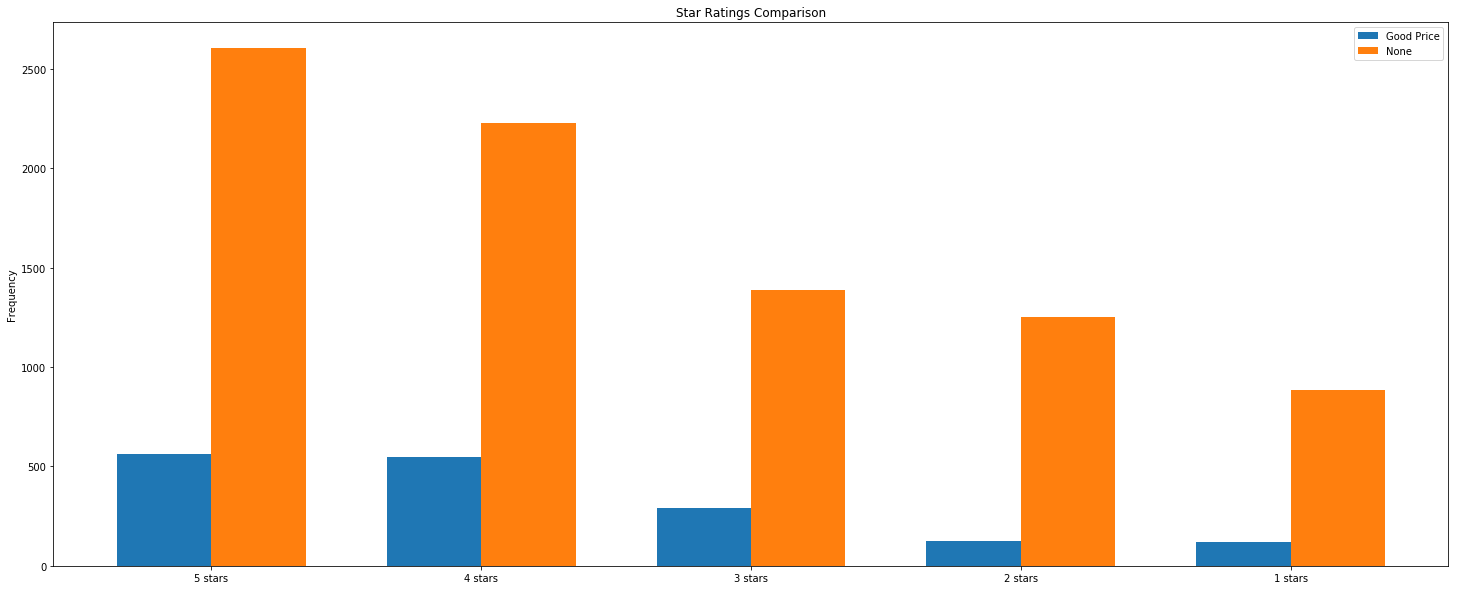

In [49]:
feature_rating(df_chi,'Good Price')

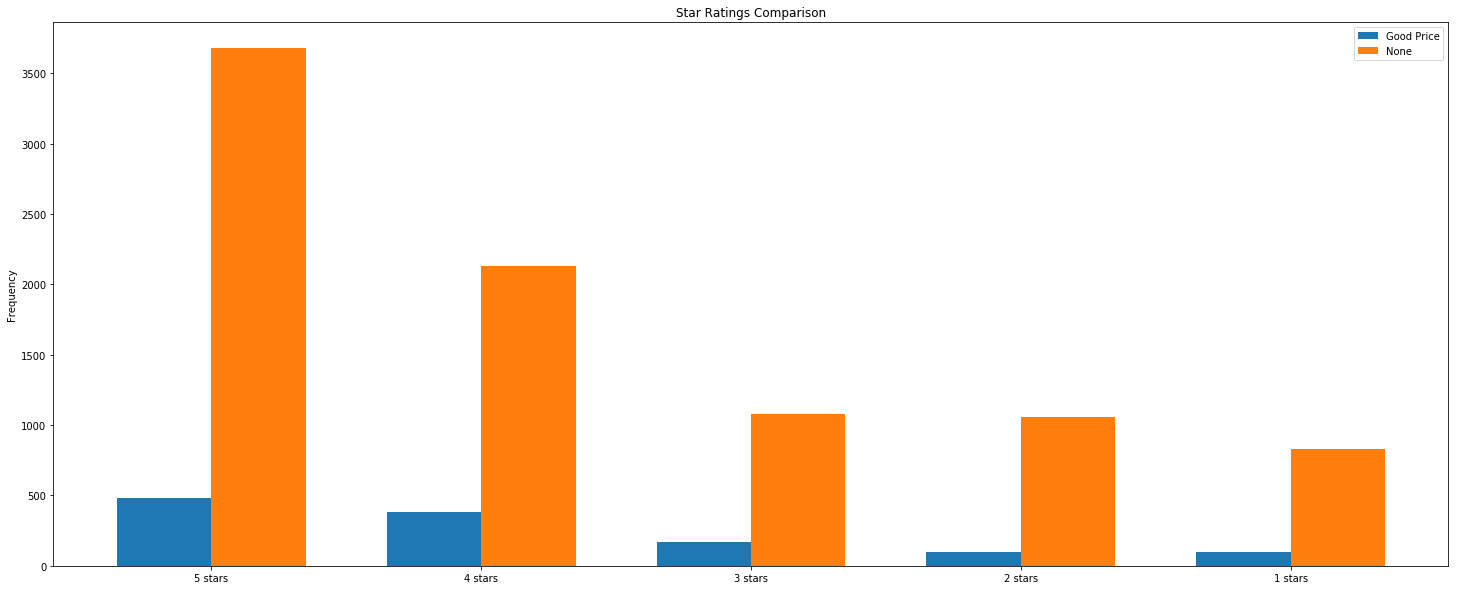

In [50]:
feature_rating(df_ital,'Good Price')

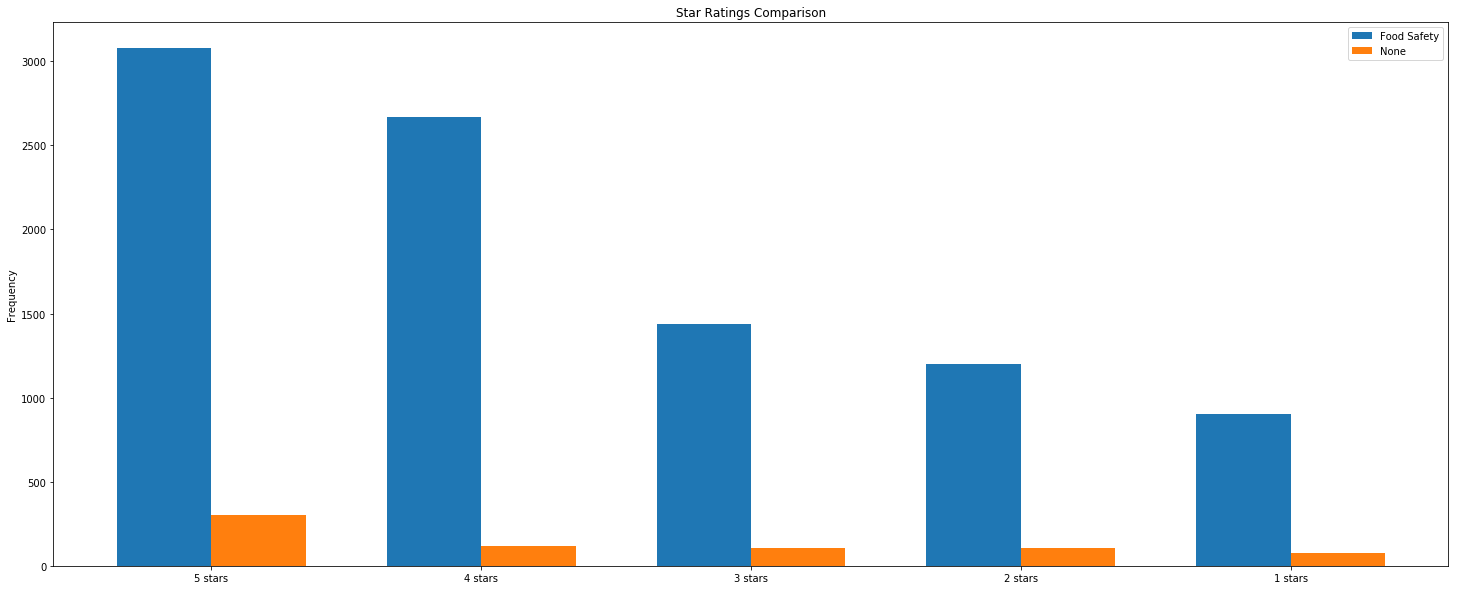

In [51]:
feature_rating(df_chi,'Food Safety')

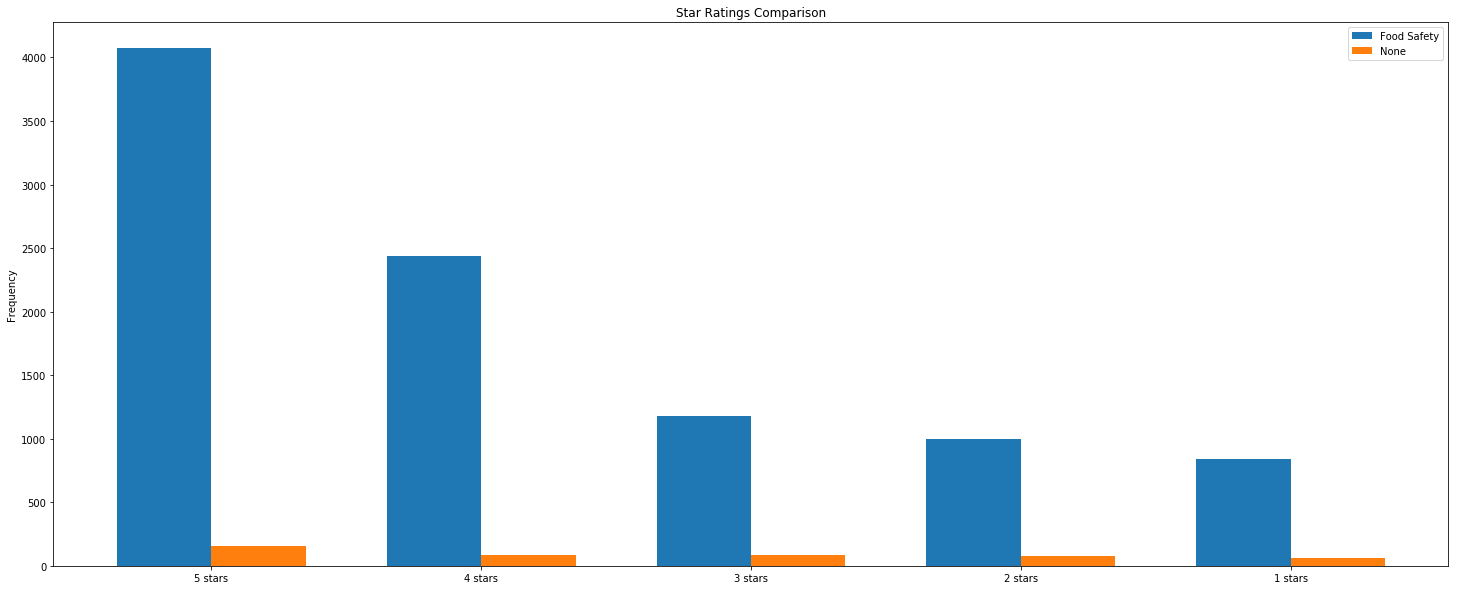

In [52]:
feature_rating(df_ital,'Food Safety')

# Conclusion

As seen from the code below, not only was our hypothesis correct, but it is evident that customers rated restaurants higher when certain qualities were satisfied. Here we can see that the order of importance depending on what has the highest numerical value in the linear regression result.

### For Chinese Reviews:

Food Safety was the most important to customers, Good Taste was the second most important to customers, Good Ambience was the third most important to customers, Good Service was the fourth most important to customers, Good Price was the fifth most important to customers, and Short Wait was the least important to customers.

### For Italian Reviews:

Food Safety was the most important to customers, Good Taste was the second most important to customers, Good Service was the third most important to customers, Good ambience was the fourth most important to customers, Short Wait was the fifth most important to customers, and Good Price was the least important to customers.

-----Chinese Restaurants-----
Intercept: 
 1.78394808374
Coefficients: 
 {'Good Taste': 0.84792615643238367, 'Short Wait': 0.054554902644720848, 'Good Service': 0.32842489920110268, 'Good Ambience': 0.38659473975004321, 'Good Price': 0.15748555840815276, 'Food Safety': 1.0389661278385214}


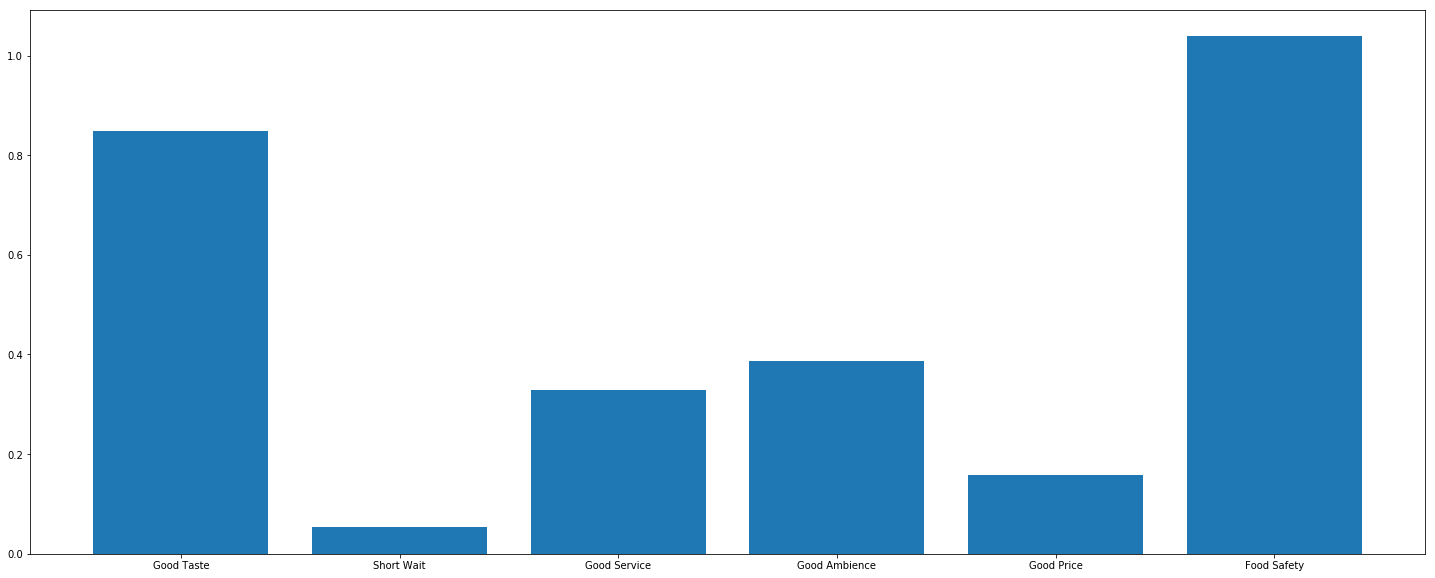

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.191
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     394.2
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:10:09   Log-Likelihood:                -16558.
No. Observations:               10000   AIC:                         3.313e+04
Df Residuals:                    9993   BIC:                         3.318e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.7839      0.050     35.783

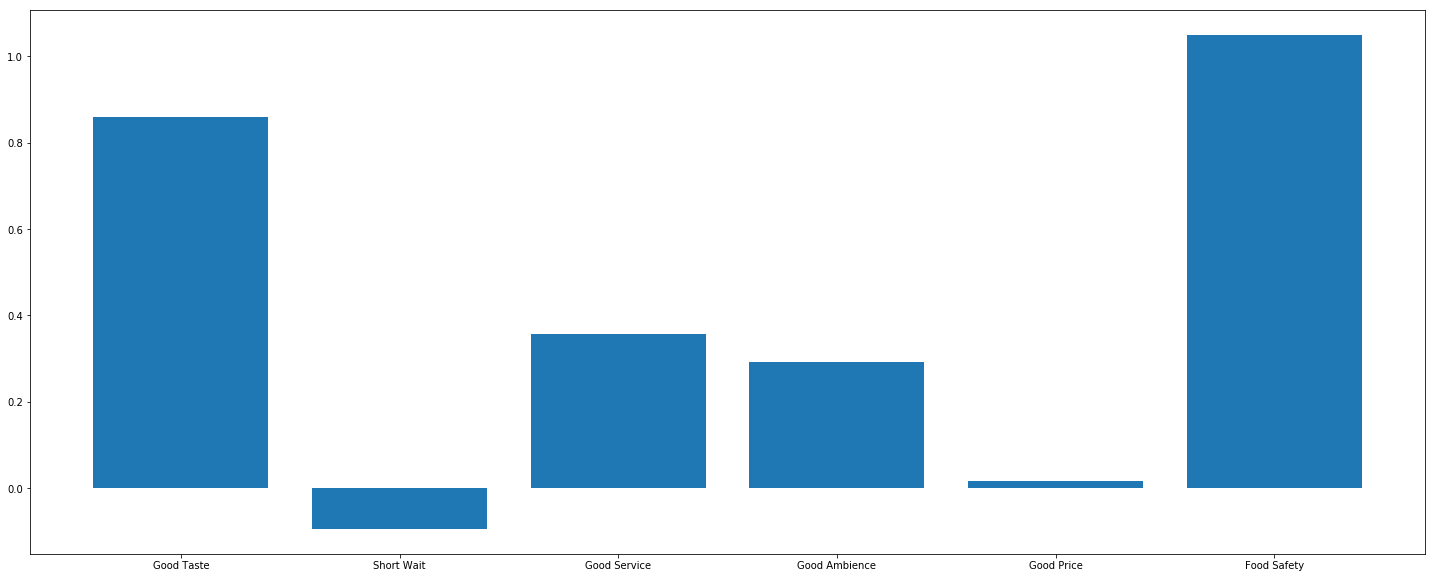

                            OLS Regression Results                            
Dep. Variable:                  stars   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     327.5
Date:                Wed, 12 Jun 2019   Prob (F-statistic):               0.00
Time:                        23:10:10   Log-Likelihood:                -16484.
No. Observations:               10000   AIC:                         3.298e+04
Df Residuals:                    9993   BIC:                         3.303e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.9722      0.061     32.128

In [53]:
# Run multiple linear regression to see how each positive category contributes to star ratings
import statsmodels.api as sm

def regress(df,string):
    
    X = df[['Good Taste','Short Wait','Good Service','Good Ambience','Good Price','Food Safety']]
    Y = df['stars']

    regr = linear_model.LinearRegression()
    regr.fit(X, Y)
    dict_coef = {}
    dict_coef.update({'Good Taste': regr.coef_[0]})
    dict_coef.update({'Short Wait': regr.coef_[1]})
    dict_coef.update({'Good Service': regr.coef_[2]})
    dict_coef.update({'Good Ambience': regr.coef_[3]})
    dict_coef.update({'Good Price': regr.coef_[4]})
    dict_coef.update({'Food Safety': regr.coef_[5]})

    print(string)
    print('Intercept: \n', regr.intercept_)
    print('Coefficients: \n', dict_coef)
    
    plt.bar(range(len(dict_coef)), dict_coef.values(), align='center')
    plt.xticks(range(len(dict_coef)), list(dict_coef.keys()))
    plt.show()
    
    X = sm.add_constant(X)
    model = sm.OLS(Y, X)
    result = model.fit()
    print (result.summary())
    
regress(df_chi,'-----Chinese Restaurants-----')
regress(df_ital,'-----Italian Restaurants-----')

Our team uses Ordinary Least Squares Model to explain the relationship between each independent variable 
(short wait, good taste, good service, ...) and dependent variable. We have a total of 10000 observations. 
That is a really large sample. 

R^2 is the same as Adj R^2, 0.191 and 0.164. 16% - 19% of the observed variation can be explained by the model's inputs.
This is not very high, perhaps because we only focus on the impacts of positive phrases.

The F statistic is 394.2 and 327.5. So they are large enough for us to reject the Null Hypothesis. In other words, 
the positive phrases have impacts on the star-ratings.

As you can see in OLS results: if the dummy variable of good taste is 1, and holding other variables fixed,
then the rating would on average goes up by 0.8479 or 0.8587.

Similar conclusion can be drawn with the rest of variables: Good service, Good ambience, Good Price, Food Savety.

The different parameters for Chinese and Italian restaurants show us the different evaluation/preference of customers.

For the negative coefficients (Short Wait and Good Price) of Italian restaurants, we think that they appear perhaps due to an internal correlation, independent from customers' preferences. For example, when an Italian restaurant doesn't care about food enough, this might lead to short wait and good price, but for customers, the utility from Short Wait and Good Price is too little compare to the pain from eating not-tasty food. Our limited choices of words and sentiment analysis algorithm should not have too much impact on causing this result.

# Discussion

# Limitations of Method and Analysis

Overall, the quality of the restaurant, the star rating of the restaurant, and the words used to describe it are dependent on each individual person's experience which could be dictated by a number of factors outside the scope of the restaurant's control.

For instance, one limitation to our analysis is that user sentiment is often overly negative or overly positive. Since people are not likely to leave Yelp reviews for every business they visit, they are far more likely to leave when their experience falls on the extreme end of the spectrum: either extremely negative or extremely positive.

Furthermore, a person’s mood influenced by factors outside of the business or experience itself can also play an important role in determining the sentiment and the choice of words used in the review. It would most likely be beneficial to this project, if taken a step further, if we coordinated with Yelp to prompt a questionaire prior to an individual writing a review so we would know  that asked the individual 

Moreover, the way our code was written means that every time this is run, there will be a different set of 10,000 samples reviewed. So we could only analyze results once we had run all of our code. In the future, if we were to re-use this and further analyze the results, it would be in our best interest to use np.randomseed() and set a constant value in that function so that we know we are able to analyze the same sample of data every time.

# Ethics and Privacy

The data for this project was acquired from Yelp Open Dataset which allows access to reviews and user data for “personal, education, and academic purposes”. While this data is publicly available and Yelp permits the use of data, it is important to consider that the data is crowd sourced and user gendered. Because of this, it is possible that Yelp has questionable rights to the data itself. Legally, Yelp does require its users to agree to a certain set of “terms and conditions” before they can post a review on the site and within their privacy policy they are transparent about their ability to share public and user information with aggregate third parties. However it is more than likely that its user can be potentially unclear or misinformed about how their data can be used as these “terms and conditions” are often criticized for being filled with hard to understand language and legal jargon, along with the fact that most users do not take the time to read through their data and privacy rights. Ultimately in legal terms, Yelp has every right to share this information publicly, however the ethics can be questioned within the problem of whether users are actually made of aware of the right they are signing away. 

One potential concern our project could post is how our identification and analysis of how certain patterns of words express specific sentiments is how these results might lead to an ability to filter or censor certain reviews. Currently, Yelp filters through reviews by running them through an algorithm that determines whether they might be falsified or deceptive. They also highlight information they believe is useful by labeling them as “recommended” or “non recommended”. As yelp prides itself on its commitment to being an open and public source of information and has created a reputation for itself as a forum that provides quality, reliable information, this ability to further filter through reviews can lend itself to a misuse of  their use to “filter” reviews they determine to not fall in line with typical patterns. Yelp already filters review’s based on a person’s profile and use an algorithm to determine which features have the most influence such as textual classifiers, sentiment analysis, people who review more often, having a profile pictures or more friends can contribute to being recommended. However because Yelp publicly commits to not allow businesses to add or delete reviews and embraces the principles of “free speech”, non recommended reviews are still accessible to users. In this way, Yelp has a unique responsibility to reject bribery or manipulation of the reviews in any way to  maintain the integrity of the service. However, Yelp does filter out reviews that they suspect to be computer generated but do not disclose the algorithm they use or method they use to filter out these reviews therefore opening doors for skepticism on just how transparent they are. 

In our actual examination of the dataset and the data set itself and how it is composed, the analysis can be problematic because we were not able to take account of the ethnic and cultural background of those who were writing the reviews that make up our dataset. Because we also choose “Italian” and “Chinese” restaurant reviews, a host of historical and cultural biases can come into play. Whether it be due a reviewer’s personal experiences and understanding of the food or the influence of stereotypes and portrayals in media, these work to shape a customer’s impression and overall rating of the restaurant. For example, the perception of a Chinese restaurant's service will differ based on someone’s ethnic background, when viewed by someone with is familiar with the culture as opposed to someone who has never come into contact with Chinese food. A customer might determine service to be subpar because of a language barrier or due to a misunderstanding of tone and gesture based on varying cultural expectations and conceptions. Therefore, the demographics of the people we sampled may not provide a completely accurate picture of correlations of sentiment across all restaurants as these understandings can be shaped by misunderstanding, misrepresentations along with personal and human biases. 


## Impact of work on society

In determining which factors have the greatest impact on customer’s star ratings, we hope through our analysis that businesses will gain knowledge on how to maximize the customer experience. By analyzing the correlation in sentiment between words and phrases with Yelp rating, businesses can market or brand themselves accordingly. One example might be that if good taste has the biggest positive impact on a customer’s star rating, knowing this can  influence business owners to allocate more funds towards promoting and pursuing this goal rather than others. On the other hand, it is also important to consider Yelp’s direct influence on customer decisions and business revenue. For example in our analysis and recognition of patterns of words and their correlations to ratings, we need to ensure that the results of our project do not influence a business ability to capitalize on certain sentiments by cutting corners or compromising the restaurant experience. Ultimately however, we hope that our data analysis serves as a useful insight into the customer experience and behavior  and to inform businesses of certain trends, patterns and correlations that can influence any adjustments or changes they make to their business. 